# DAY7 - HAM or SPAM (Gerçek veya reklam/istenmeyen mesaj)

Burada Day 7 ye ait HAM & SPAM çalışmalarımı not alacağım. Gelen mesajların spam olup olmadığını tahmin edeceğiz.

In [93]:
!pip install wordcloud

In [94]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
import pandas as pd

In [96]:
df=pd.read_csv("spam.csv", encoding='latin-1')

In [97]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [98]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [100]:
df.shape

(5572, 5)

In [101]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
#df=df[['v1','v2']]

In [102]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [103]:
df.columns=['Class','Text']

In [104]:
df

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [105]:
import seaborn as sns

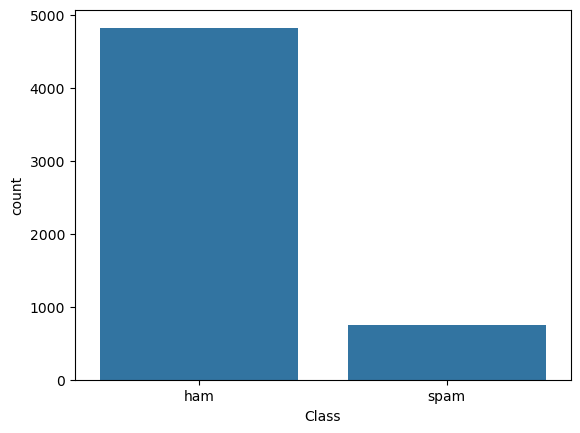

In [106]:
sns.countplot(x=df['Class']);

In [107]:
df['Class'].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

In [108]:
d={'ham':0, 'spam':1}

In [109]:
df['Class']=df['Class'].map(d) # map for döngüsünün modern hali

In [110]:
df

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


1- her şeyi küçük harf çevir <br>
2-noktalama işaretlerini kaldır <br>
3-rakamları kaldır <br>
4-satır sonlarını kaldır \n <br>
5-stopwords gereksiz kelimeleri çıkart <br>
6-Tokenize et <br>
7-Lemma ve Stemma ile ekleri kaldır ve kokleri bul <br>
8-Vectorize et

In [111]:
df['Text']=df['Text'].str.lower()

In [112]:
df['Text']=df['Text'].str.replace('[^\w\s]', ' ',regex=True) 

In [113]:
df['Text']=df['Text'].str.replace('\n', ' ',regex=True)

In [114]:
df['Text']=df['Text'].str.replace('\d+', ' ',regex=True)

In [115]:
df['Text']=df['Text'].str.replace('\r', ' ',regex=True) 

In [116]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# DRY - Dont Repaeat Yourself

In [118]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask = np.array(Image.open('image.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS, mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [119]:
ham=df[df['Class']==0]['Text']
spam=df[df['Class']==1]['Text']

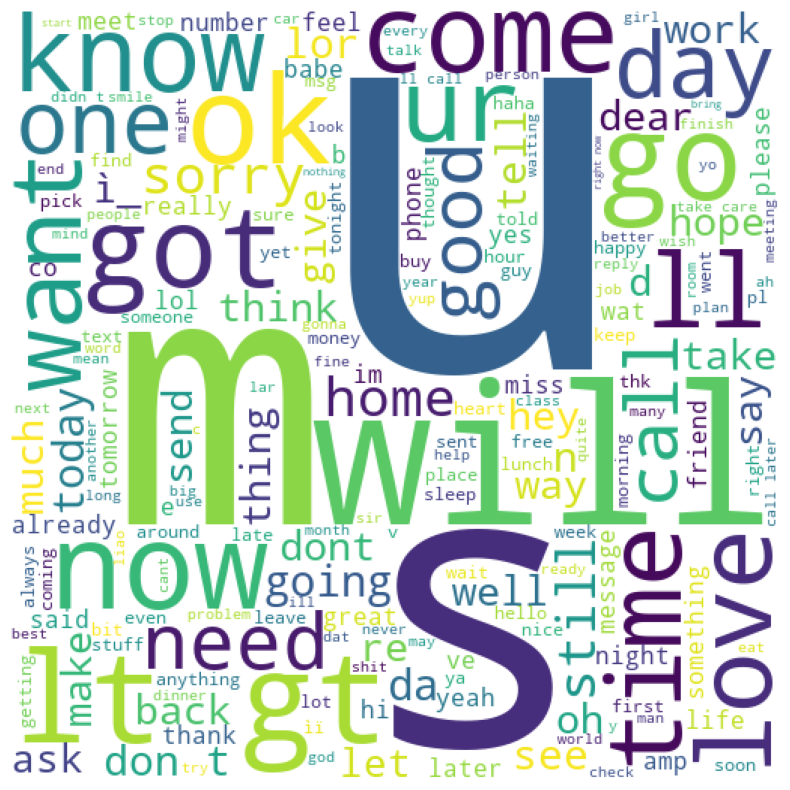

In [120]:
wc(ham,'white')

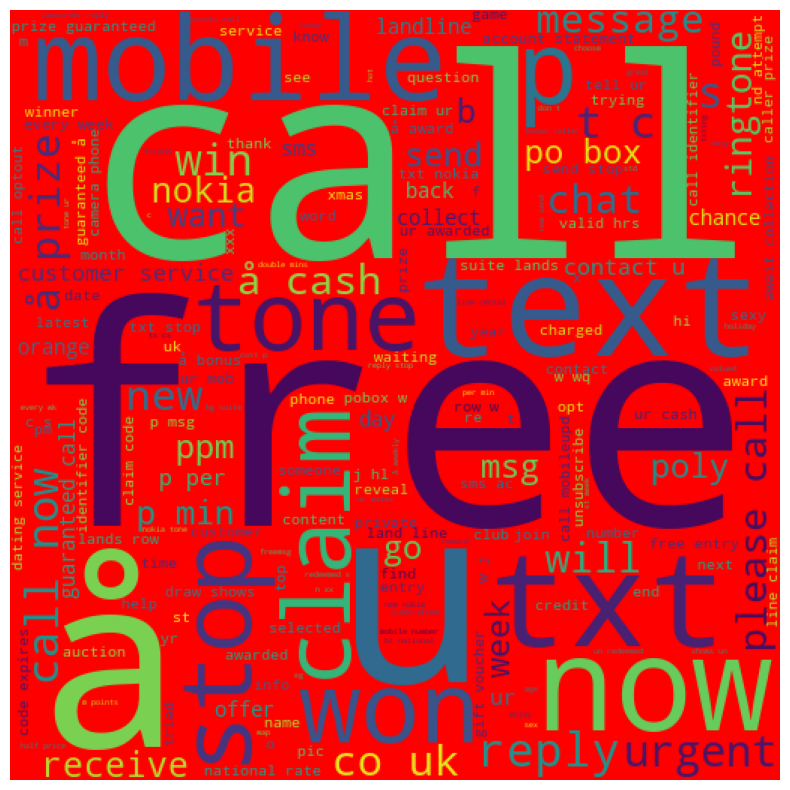

In [121]:
wc(spam,'red')

In [122]:
x=df['Text']
y=df['Class']

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
def lemmafn (text):
    words=TextBlob(text).words
    return [pr.stem(words) for words in words]

In [126]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),analyzer=lemmafn)

In [127]:
x=vect.fit_transform(x)


In [128]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.20)

In [129]:
nb=MultinomialNB()

In [130]:
model=nb.fit(x_train,y_train)

In [131]:
tahmin=model.predict(x_test)

In [132]:
accuracy_score(tahmin,y_test)

0.9757847533632287

In [133]:
tahmin

array([0, 0, 1, ..., 0, 0, 1])